# Lead Scoring case study

An X education company has 30% conversion rate and the CEO intends to raise it to 80%. This could only be acheived if only the promising leads are targeted. 

The objective is to build a logistics regression model to assign a lead score between 0 and 100 such that leads with higher conversion probability are assigned a higher lead score and vice versa for the leads with lower conversion probability. This will help the company reach conversion rate as high as 80%. The model should be able to adjust to compan'y future requirement changes. 

Steps taken to create the model are: 
- Loading and inspecting the data
- Understanding (EDA) and cleaning the data
- Data Preparation
- Train-Test Splitting
- Model Building
- Evaluating the model
- Measuring performance on Test Set
- Lead Scoring
- Conclusion

In [1195]:
# Supress Warnings

import warnings
warnings.filterwarnings("ignore")

#Importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math
import matplotlib.colors as colors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, accuracy_score


pd.set_option("display.max_columns", 50)

## Loading and inspecting the data 


In [1196]:
#Creating a dataframe and loading the data in it

df= pd.read_csv('Leads.csv')

In [1197]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [1198]:
# Dimension of the dataframe
df.shape

(9240, 37)

In [1199]:
#Statistical distribution of data
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [1200]:
# Info of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### Issues at a glance 

- Potential categorical columns that can be converted to dummy variables.
- Many columns seem to have high volume of null values, we have to analyse it before treating it 
- Prospect ID and Lead number columns can be used to detect duplicates 
- There are few columns that has value "Select" which seems the prospective lead must have not selected any option in the form and the placeholder value got saved into the database. We would want to treat these values accordingly. 

# Understanding (EDA) and cleaning the data

We will perform both overall and variable by variable analysis and determine the correct course of action for cleaning the data. 
We will do both overall and column by column analysis to 

- treat duplicates
- determine dropping columns
- rename column and value for better legibility
- determine treating missing values


#### Treat Duplicates

In [1201]:
#checking for duplicates in overall data. We can use both Prospect ID and Lead number to detect such duplication

print(all(df.duplicated(subset=['Prospect ID', 'Lead Number']) == 0))


True


In [1202]:
#There are no duplicate recrods in the data and we can safely infer that every record is a unique record. 

df.drop(['Prospect ID','Lead Number'], 1, inplace = True)

# We can drop this column as it will not beneficial for model building

In [1203]:
#checking the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 35 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

#### Determine dropping columns

In [1204]:
# replacing "Select" with Nan for better analysis 
df = df.replace("Select", np.nan)

In [1205]:
#creating reusable function to drop a column

def drop_col(column_name):
    return df.drop(column_name, axis=1, inplace=True)

In [1206]:
#creating function for computing missing value as it has to be used more than ocne

def compute_missing_values(df):
    missing_values = df.apply(lambda x: x.isnull().value_counts(normalize=True).get(True, 0))
    return missing_values


In [1207]:
compute_missing_values(df).sort_values(ascending=False)

How did you hear about X Education               0.784632
Lead Profile                                     0.741883
Lead Quality                                     0.515909
Asymmetrique Activity Score                      0.456494
Asymmetrique Profile Score                       0.456494
Asymmetrique Profile Index                       0.456494
Asymmetrique Activity Index                      0.456494
City                                             0.397078
Specialization                                   0.365801
Tags                                             0.362879
What matters most to you in choosing a course    0.293182
What is your current occupation                  0.291126
Country                                          0.266342
TotalVisits                                      0.014827
Page Views Per Visit                             0.014827
Last Activity                                    0.011147
Lead Source                                      0.003896
Get updates on

In [1208]:
# Dropping columns with more than 35% missing values
missing_values = compute_missing_values(df)
cols_to_drop = missing_values[missing_values >= 0.35].index

drop_col(cols_to_drop)


In [1209]:
#rechecking all columns

compute_missing_values(df).sort_values(ascending=False)

What matters most to you in choosing a course    0.293182
What is your current occupation                  0.291126
Country                                          0.266342
TotalVisits                                      0.014827
Page Views Per Visit                             0.014827
Last Activity                                    0.011147
Lead Source                                      0.003896
Lead Origin                                      0.000000
Newspaper                                        0.000000
A free copy of Mastering The Interview           0.000000
I agree to pay the amount through cheque         0.000000
Get updates on DM Content                        0.000000
Update me on Supply Chain Content                0.000000
Receive More Updates About Our Courses           0.000000
Through Recommendations                          0.000000
Digital Advertisement                            0.000000
Search                                           0.000000
X Education Fo

#### Rename column for better legibility

In [1210]:
# checking for potential columns that could be renamed

df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [1211]:
## All the columns are good to go. 
df.rename(columns={'TotalVisits': 'Total Visits'}, inplace=True)

In [1212]:
#checking the change has taken effect

df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'Total Visits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

#### Categorical columns analysis

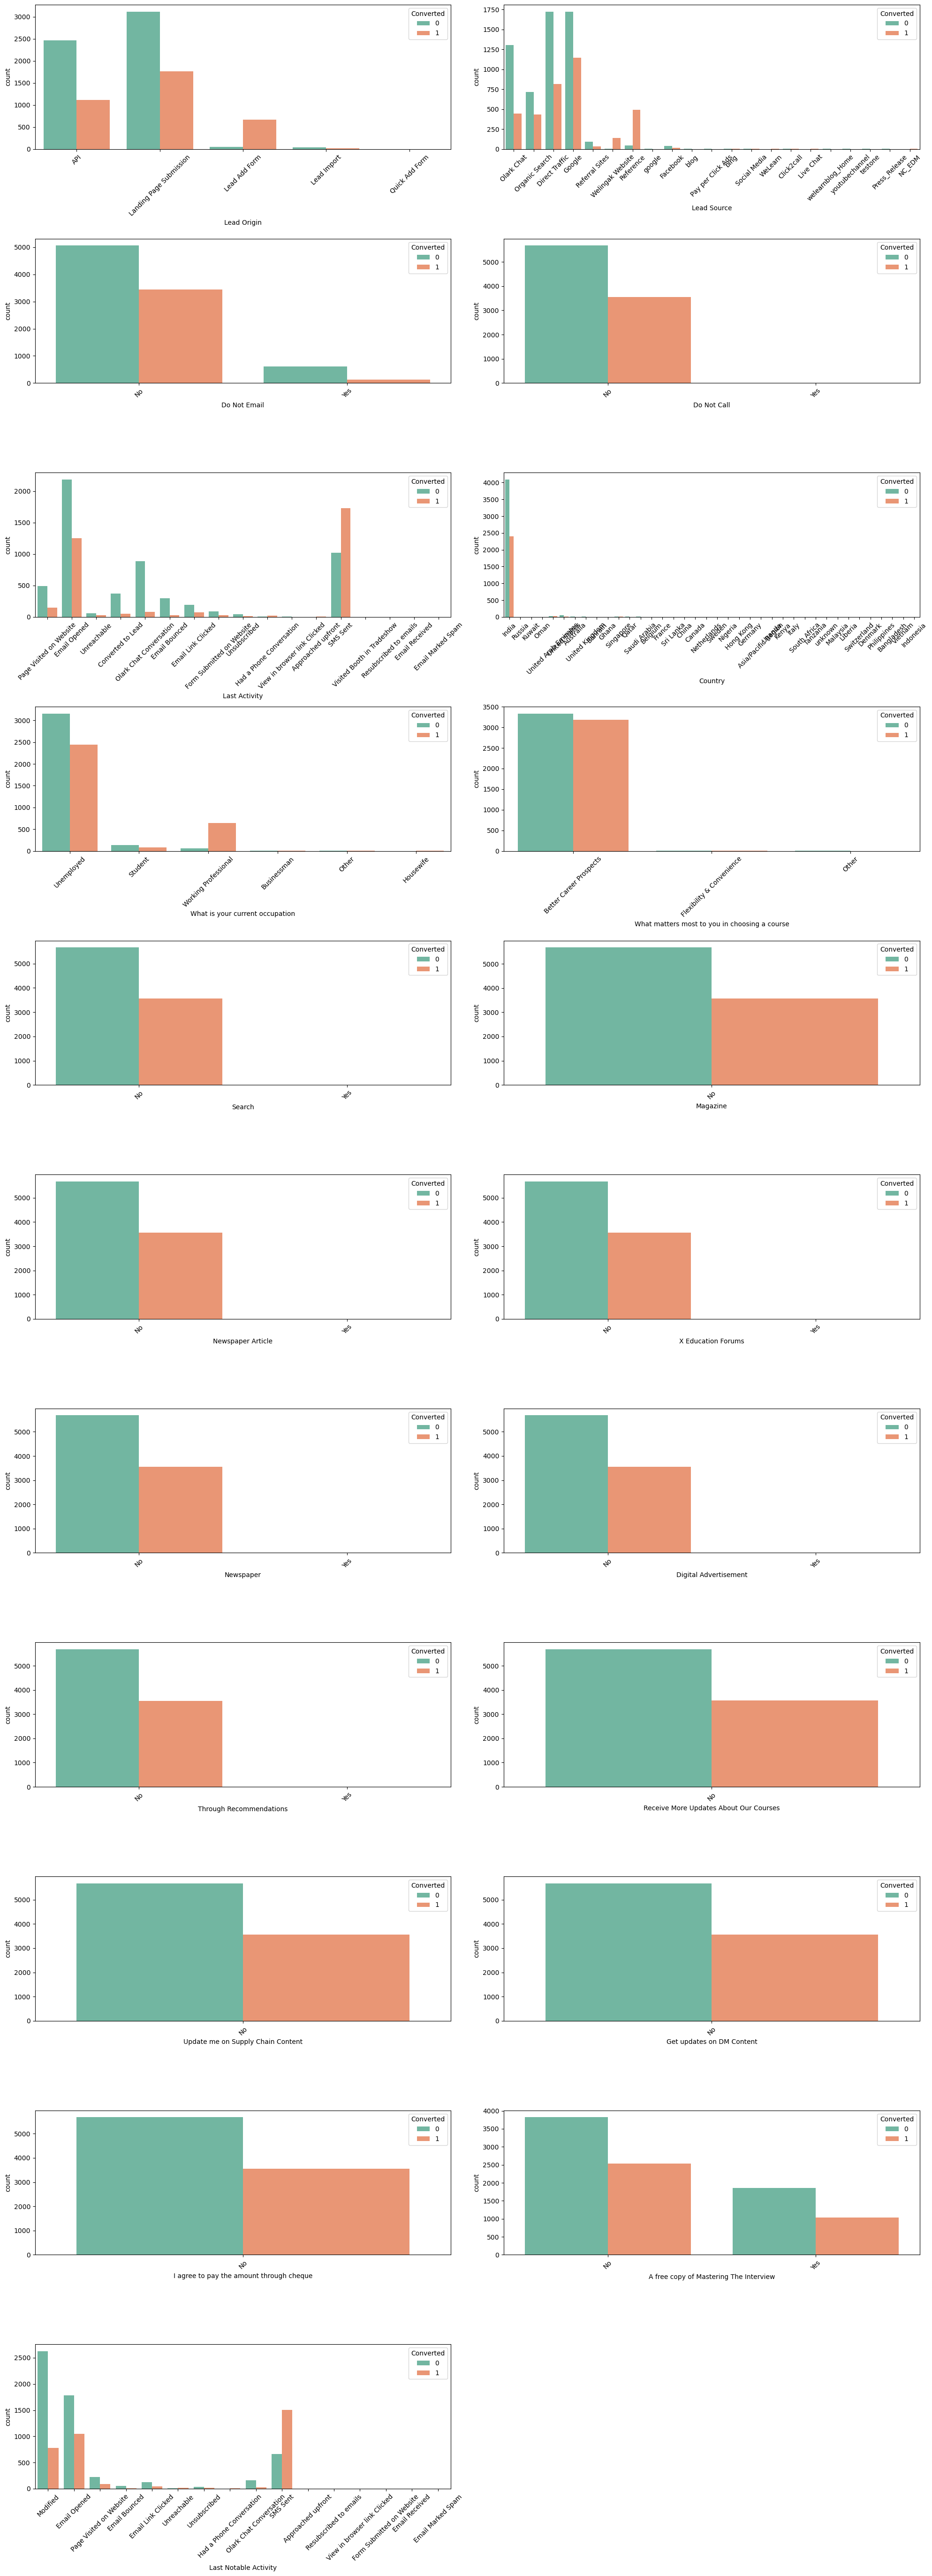

In [1213]:
# Calculate categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Calculate the number of rows and columns for the subplots
n = len(categorical_cols)
ncols = 2 # Number of plots per row
nrows = math.ceil(n / ncols)

fig, axs = plt.subplots(nrows, ncols, figsize=(20, 5*nrows))

for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, hue="Converted", data=df, ax=axs[i//ncols, i%ncols], palette='Set2') #using Set2 to assign Green = Converted, Red = Not Converted
    plt.setp(axs[i//ncols, i%ncols].xaxis.get_majorticklabels(), rotation=45)  # Rotate x-axis labels

# Remove empty subplots
if n % ncols != 0:
    for j in range(n, nrows*ncols):
        fig.delaxes(axs.flatten()[j])

plt.tight_layout()
plt.show()


In [1214]:
#Creating list of columns that are imbalanced 
cols_with_imbalance=(['Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                 'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                 'Update me on Supply Chain Content',
                 'Get updates on DM Content','I agree to pay the amount through cheque'])

In [1215]:
#dropping the imbalanced columns
drop_col(cols_with_imbalance)

In [1216]:
#rechecking the categoricalcolumns
compute_missing_values(df.select_dtypes(include=['object', 'category'])).sort_values(ascending=False)

What matters most to you in choosing a course    0.293182
What is your current occupation                  0.291126
Country                                          0.266342
Last Activity                                    0.011147
Lead Source                                      0.003896
Lead Origin                                      0.000000
Do Not Email                                     0.000000
Do Not Call                                      0.000000
A free copy of Mastering The Interview           0.000000
Last Notable Activity                            0.000000
dtype: float64

In [1217]:
#creating reusable function for distribution of values in the cateogrical columns

def evaluate_col(column_name):
    return df[column_name].value_counts(dropna=False)
    

In [1218]:
#creating a reusable function to visualize a categorical column
def visualize_col(column_name):
    plt.figure(figsize=(15,5))
    s1 = sns.countplot(x=column_name, hue='Converted', data=df, palette='Set2')
    s1.set_xticklabels(s1.get_xticklabels(), rotation=45)
    plt.show()

#### Analysing "What matters most to you in choosing a course" column

In [1219]:
evaluate_col('What matters most to you in choosing a course')

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [1220]:

# Even if we impute the ~30% missing value with Better Career Prospects" there is no variance in the data. Hence it can be dropped
drop_col('What matters most to you in choosing a course')

#### Analysing column What is your current occupation

In [1221]:
evaluate_col('What is your current occupation')

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [1222]:
#We cannot impute 30% of null values with "Unemployed" as it would mislead the analysis, therefore imputing it with "unknown"
df['What is your current occupation'] = df['What is your current occupation'].replace(np.nan, 'unknown')


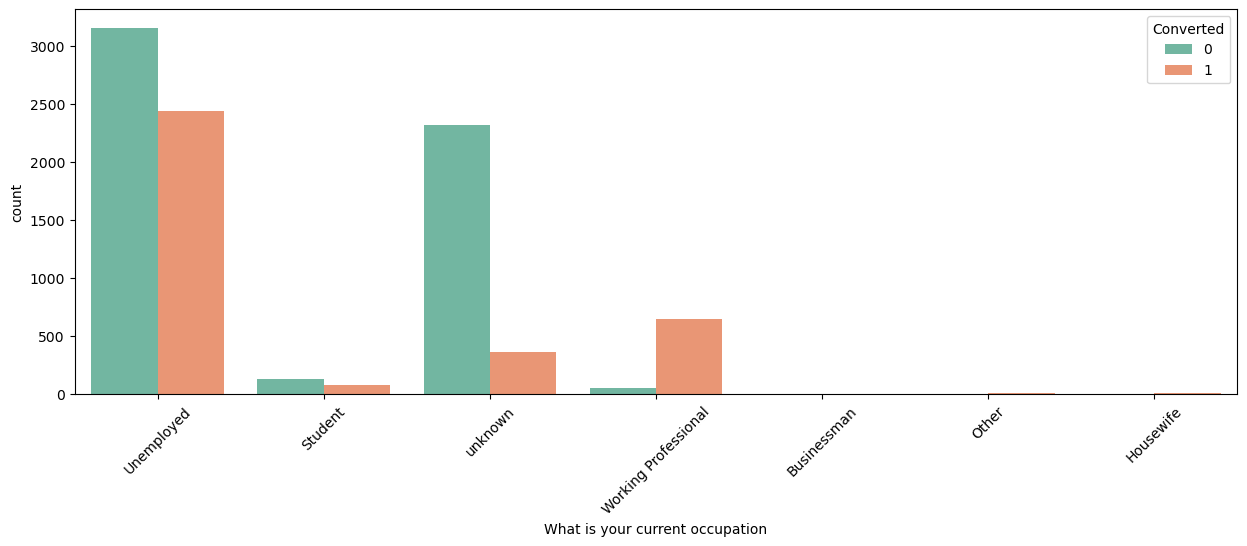

In [1223]:
visualize_col('What is your current occupation')

#### Analysing country

In [1224]:
df['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [1225]:
#Imputing missing values in Country with "unknown"
df['Country'] = df['Country'].replace(np.nan,'unknown')

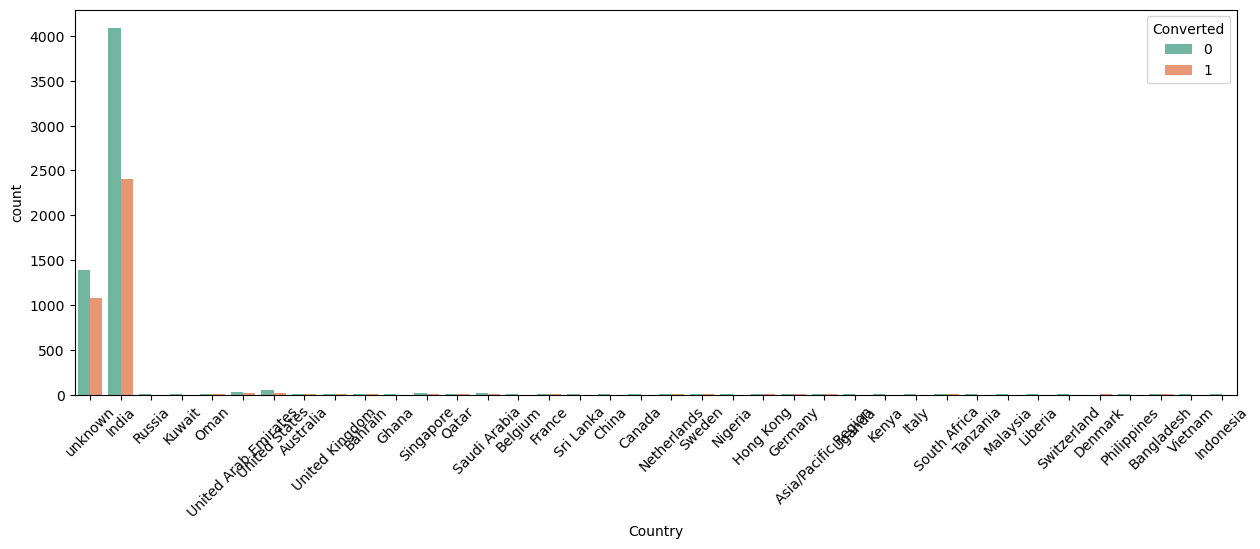

In [1226]:
visualize_col('Country')

In [1227]:
#Since India and unknown are the most dominant values, there is not much variance in the data and is not valuable for model building
drop_col('Country')


#### Analysing column Last Activity

In [1228]:
evaluate_col('Last Activity')

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [1229]:
# Since missing value is less than 1%, we can impute it with the mode value "Email Opened"
df['Last Activity'] = df['Last Activity'].replace(np.nan, df['Last Activity'].mode()[0])

#Colate values that has frequency lower than 100 as new groups for ease of interpretation
df['Last Activity'] = df['Last Activity'].replace(['Had a Phone Conversation', 
                                                       'Approached upfront',
                                                        'View in browser link Clicked',
                                                   'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Digital_or_Direct_Engagement')

df['Last Activity'] = df['Last Activity'].replace(['Unreachable','Unsubscribed',       
                                                        'Email Marked Spam'],'Not_Contactable')



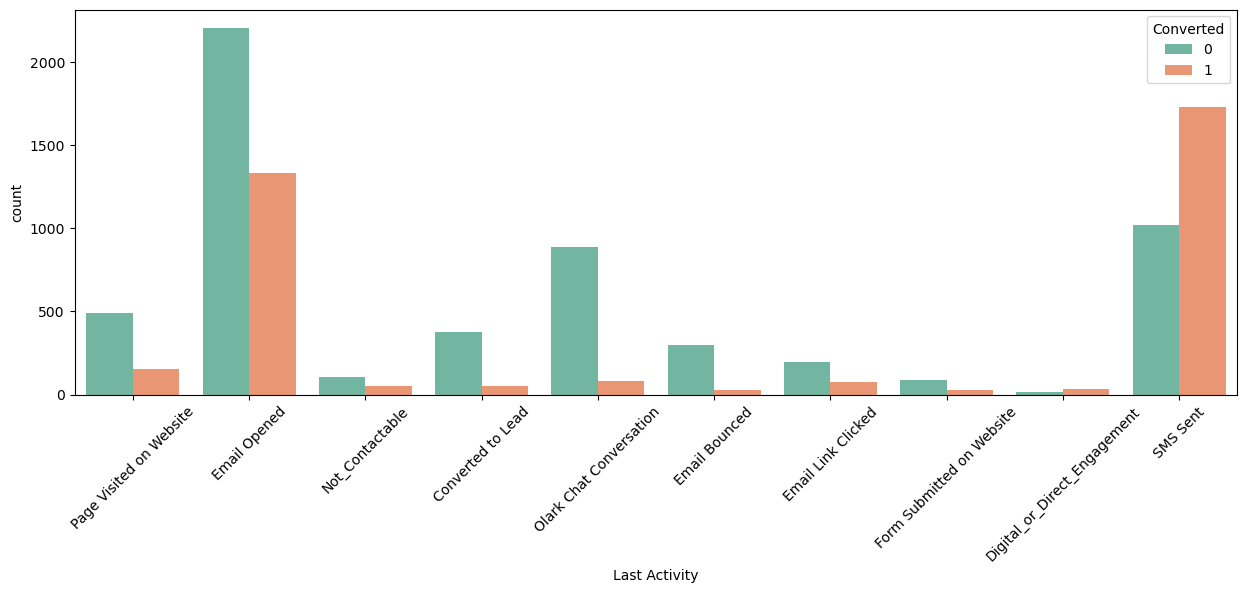

In [1230]:
visualize_col('Last Activity')

#### Analysing column Lead Source

In [1231]:
evaluate_col('Lead Source')

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [1232]:

#replacing Nan Value with Google
df['Lead Source'] = df['Lead Source'].replace(np.nan,'Google')

#'Lead Source' is having same label name 'Google' but in different format i.e 'google', So converting google to Google
df['Lead Source'] = df['Lead Source'].replace('google','Google')

#colate values that has lower frequency to "Others" for easy interpretation

df['Lead Source'] = df['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM','Live Chat']  ,'Others')


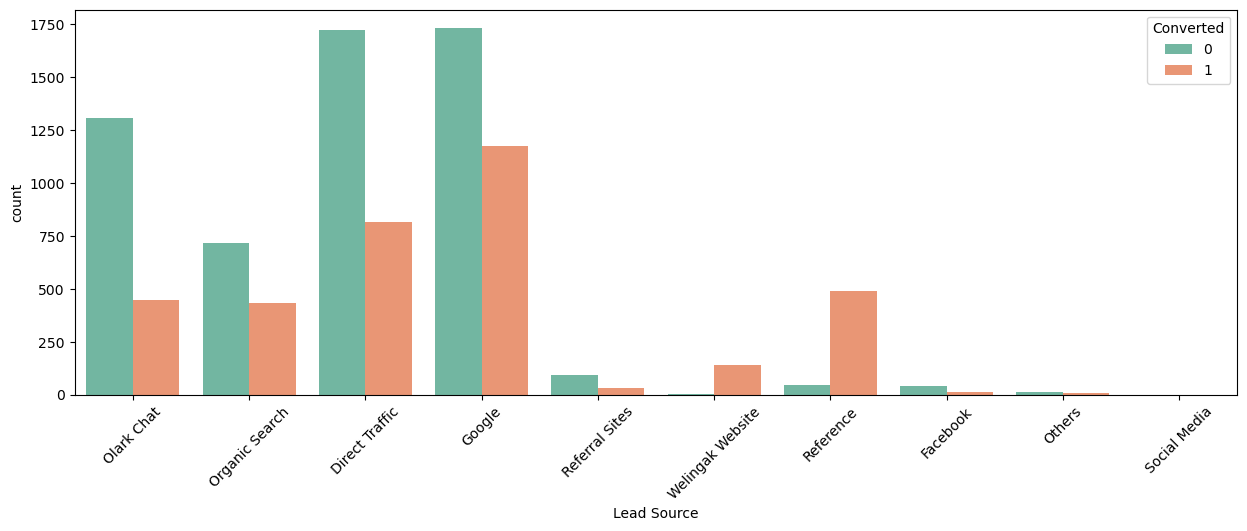

In [1233]:
visualize_col('Lead Source')

#### Analysing column Lead Origin

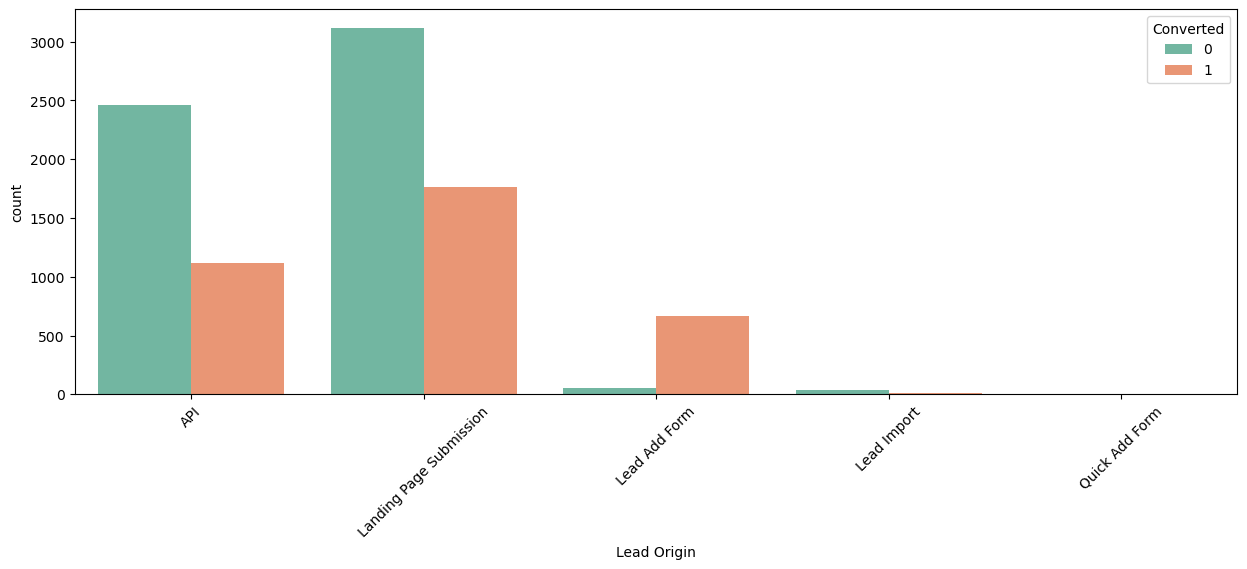

In [1234]:
visualize_col('Lead Origin')

No modification or changes required

#### Analysing column Do Not Email

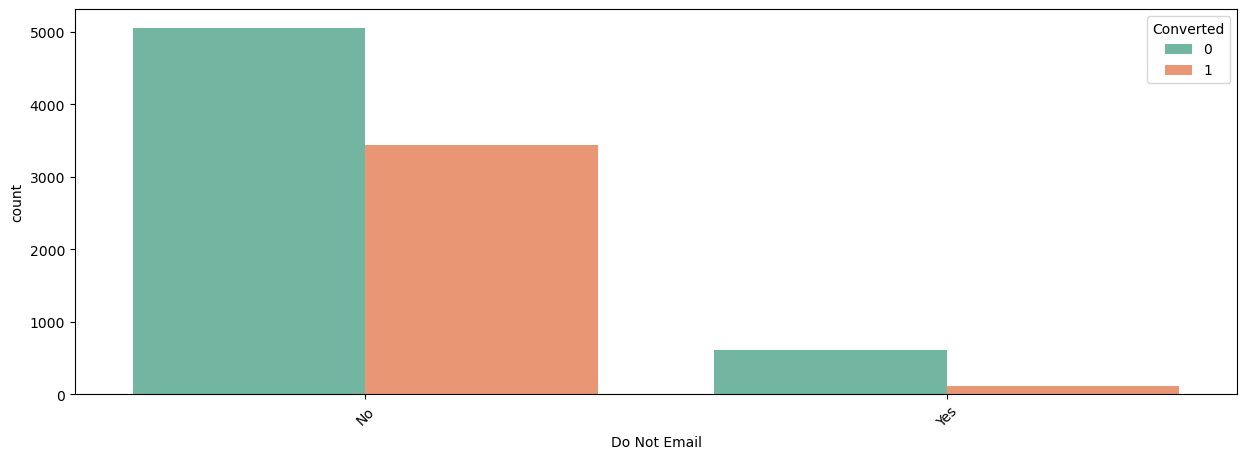

In [1235]:
visualize_col('Do Not Email')

No modification or changes required

#### Analysing column Do Not Call

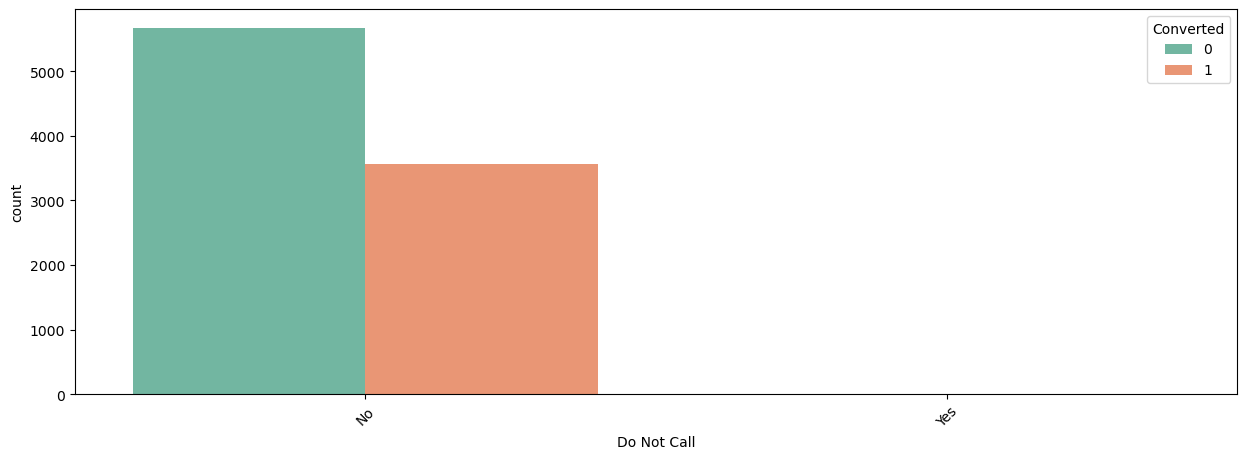

In [1236]:
visualize_col('Do Not Call')

In [1237]:
evaluate_col('Do Not Call')

No     9238
Yes       2
Name: Do Not Call, dtype: int64

In [1238]:
# This column is imbalanced and will not add any value to our model building, we can drop this column

drop_col('Do Not Call')

#### Analysing A free copy of Mastering The Interview

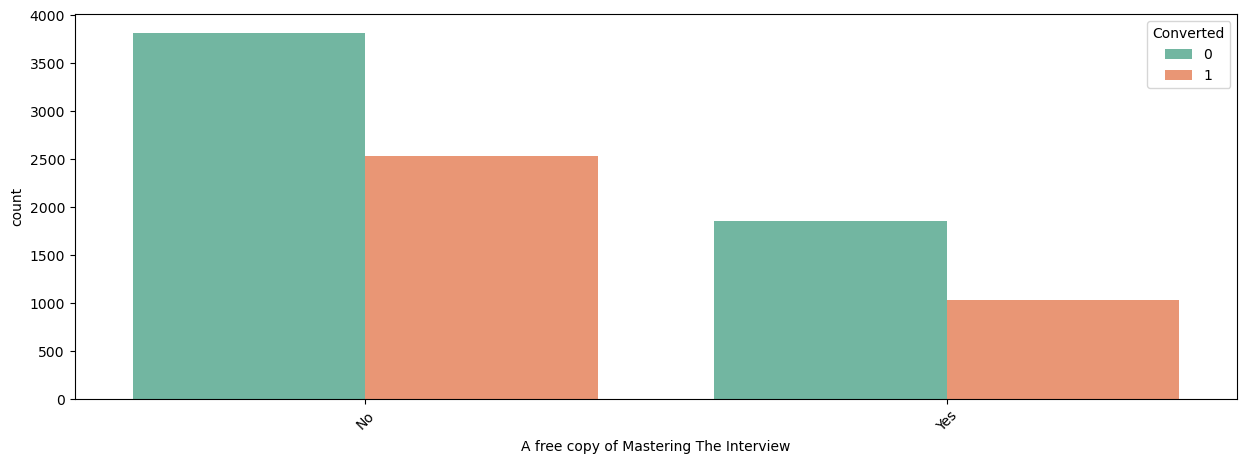

In [1239]:
visualize_col('A free copy of Mastering The Interview')

No modification or changes required

#### Analysing column "Last Notable Activity"

In [1240]:
evaluate_col('Last Notable Activity')

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [1241]:
# Colate values with lower frequency as new groups for better interpretation

df['Last Notable Activity'] = df['Last Notable Activity'].replace(['Had a Phone Conversation',                                                                  
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Digital_or_Direct_Engagement')

df['Last Notable Activity'] = df['Last Notable Activity'].replace(['Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced'],'Not_Contactable')

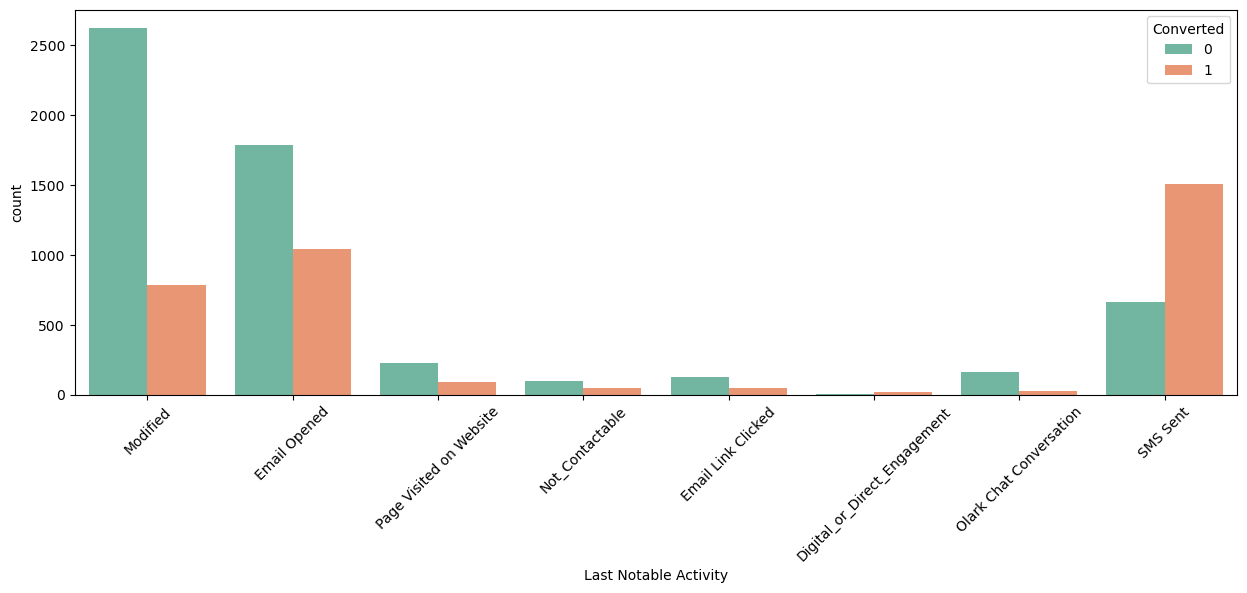

In [1242]:
visualize_col('Last Notable Activity')

#### Numerical Variable Analysis

In [1243]:
compute_missing_values(df.select_dtypes(include=['number'])).sort_values(ascending=False)

Total Visits                   0.014827
Page Views Per Visit           0.014827
Converted                      0.000000
Total Time Spent on Website    0.000000
dtype: float64

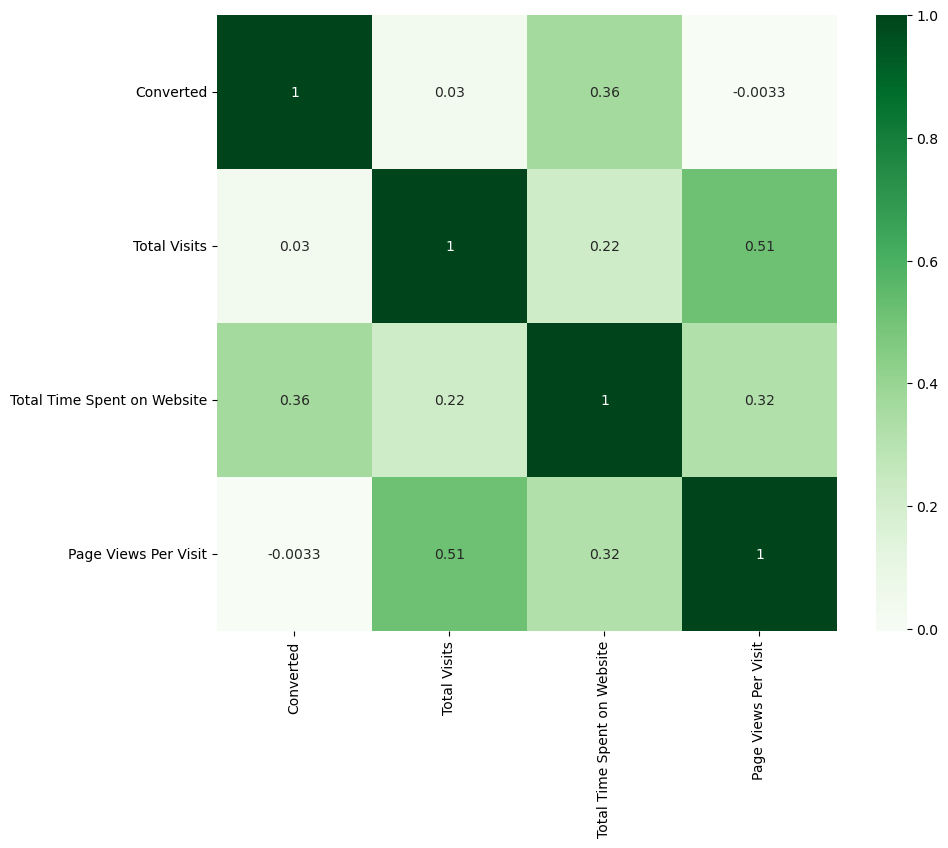

In [1244]:
#Checking correlations for given numerical varaibles

# Size of the figure
plt.figure(figsize=(10,8))


sns.heatmap(df.corr(), cmap="Greens", annot=True)
plt.show()


#### Analysing column "Total Visits"

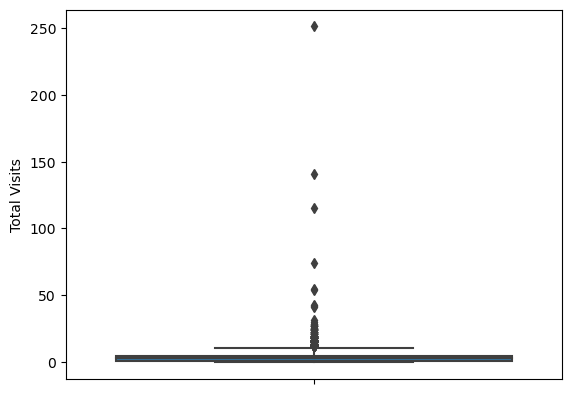

In [1245]:
#visualizing spread of variable Total Visits

sns.boxplot(y=df['Total Visits'])
plt.show()

In [1246]:
df['Total Visits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])


count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: Total Visits, dtype: float64

In [1247]:
# checking for null values
round(df['Total Visits'].isnull().sum()/len(df),2)*100

1.0

In [1248]:
#Imputing the 1% of missing value with median
df['Total Visits'].fillna(df['Total Visits'].median(), inplace=True)


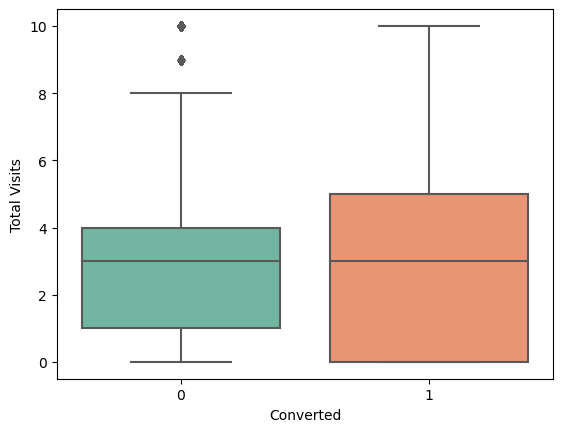

In [1249]:
#Treating outliers by capping to 95% value for analysis 

percentiles = df['Total Visits'].quantile([0.05,0.95]).values
df['Total Visits'][df['Total Visits'] <= percentiles[0]] = percentiles[0]
df['Total Visits'][df['Total Visits'] >= percentiles[1]] = percentiles[1]

# Create a boxplot to visualize the column after treatment with respect to the target column = "Converted"
sns.boxplot(data = df, x = 'Converted', y = 'Total Visits', palette='Set2')

plt.show()

#### Analyzing Page Views Per Visit

In [1250]:
df['Page Views Per Visit'].describe()


count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

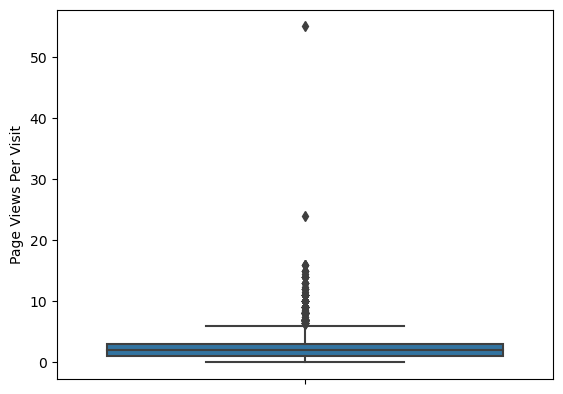

In [1251]:
# visualizing spread of column 'Page Views Per Visit'
sns.boxplot(y =df['Page Views Per Visit'])
plt.show()

In [1252]:
# checking for null values
round(df['Page Views Per Visit'].isnull().sum()/len(df),2)*100

1.0

In [1253]:
#Imputing the 1% of missing value with median
df['Page Views Per Visit'].fillna(df['Page Views Per Visit'].median(), inplace=True)


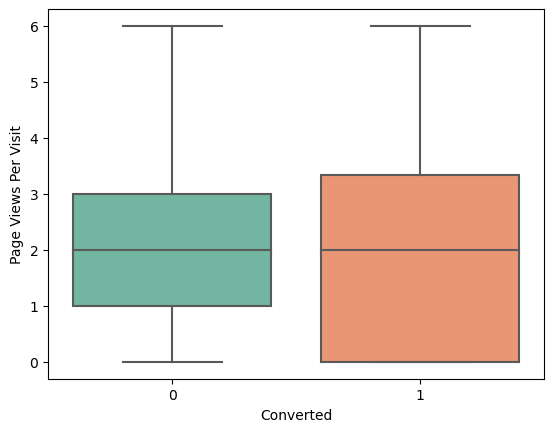

In [1254]:
# We need to treat the outliers as it is suppressing the data distribution

#Outlier Treatment: capping the outliers to 95% value for analysis
percentiles = df['Page Views Per Visit'].quantile([0.05,0.95]).values
df['Page Views Per Visit'][df['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
df['Page Views Per Visit'][df['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

#visualizing variable after outlier treatment
sns.boxplot(data = df, x = 'Converted', y = 'Page Views Per Visit', palette='Set2')
plt.show()

#### Analyzing Converted 

In [1255]:
# checking for null values
round(df['Converted'].isnull().sum()/len(df),2)*100

0.0

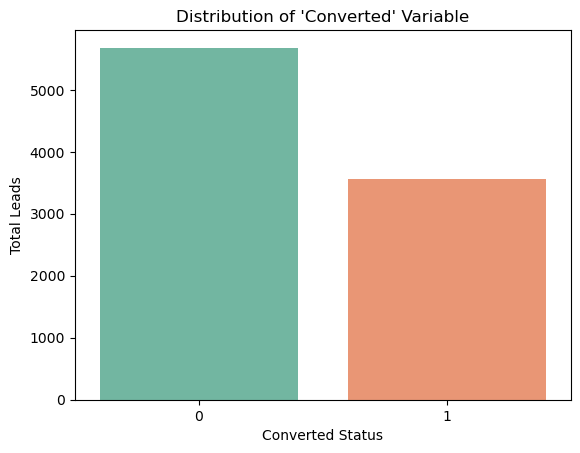

In [1256]:
#Visualizing Distribution of 'Converted' Variable
sns.countplot(x= df.Converted, palette ="Set2")
plt.xlabel("Converted Status")
plt.ylabel("Total Leads")
plt.title("Distribution of 'Converted' Variable")
plt.show()

In [1257]:
current_conversion_rate = df['Converted'].mean() * 100
print(current_conversion_rate)

38.53896103896104


#### Analyzing Total Time Spent on Website 

In [1258]:
# checking for null values
round(df['Total Time Spent on Website'].isnull().sum()/len(df),2)*100

0.0

In [1259]:
df['Total Time Spent on Website'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])


count    9240.000000
mean      487.698268
std       548.021466
min         0.000000
5%          0.000000
25%        12.000000
50%       248.000000
75%       936.000000
90%      1380.000000
95%      1562.000000
99%      1840.610000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

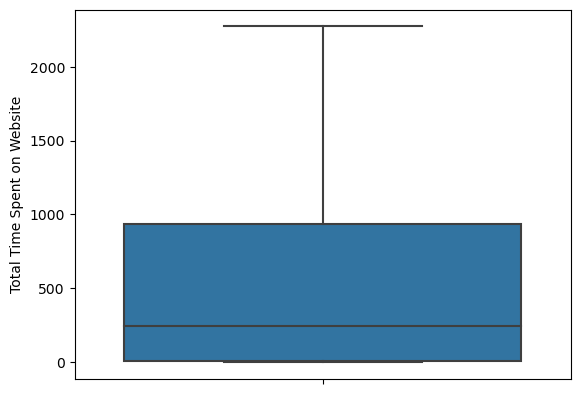

In [1260]:
#visualizing the spread of values

sns.boxplot(y = df['Total Time Spent on Website'])
plt.show()

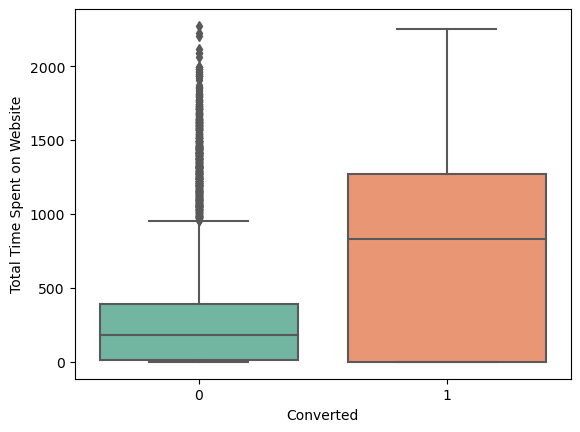

In [1261]:
# There are not many outliers, we can continue to visualize it against "Converted" column

sns.boxplot(data = df, x = 'Converted', y = 'Total Time Spent on Website', palette='Set2')
plt.show()


### Insights from data cleaning and EDA section

Columns were dropped 
- if the missing values was greater than 35% 
- the column that were imbalanced and the classes did not represent the target variable equally 
- the column had low variance where either number of classes were either very close to each other or one dominated all the others. 

Summary of columns that were retained
- Last Activity revealed that Email Opened had lower conversion rate as compared to the SMS Sent
- What is your current occupation revealed that conversion rates of unemployed and working professional is high
- Current conversion rate ~38% 
- Total Visits, Page Views per visit: Median for both converted and non converted in total visits are alnmost same, nothing can be concluded. Also both these are highly correlated ~0.77
- Total Time Spent on Website revealed that leads spending more time on the website are more likely to convert

# Data Preparation

We will take folloing steps 

- converting Yes/No column to binary values
- creating dummy variables

In [1262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   Total Visits                            9240 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9240 non-null   float64
 7   Last Activity                           9240 non-null   object 
 8   What is your current occupation         9240 non-null   object 
 9   A free copy of Mastering The Interview  9240 non-null   object 
 10  Last Notable Activity                   9240 non-null   obje

In [1263]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,Total Visits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Not_Contactable,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Unemployed,No,Modified


In [1264]:
# listing columns eligible for converting binary variables
binary_cols = ['Do Not Email', 'A free copy of Mastering The Interview']

#creating function to map the 1/0 to Yes/No
def map_binary(x):
    return x.map({'Yes':1,'No':0})


In [1265]:
df[binary_cols] = df[binary_cols].apply(map_binary)

In [1266]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,Total Visits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Unemployed,0,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Unemployed,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Student,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Not_Contactable,Unemployed,0,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Unemployed,0,Modified


In [1267]:
# Listing columns eligible for dummy variable creating

dummy_cols = df.select_dtypes(include = ['object','category']).columns
dummy_cols

Index(['Lead Origin', 'Lead Source', 'Last Activity',
       'What is your current occupation', 'Last Notable Activity'],
      dtype='object')

In [1268]:
# creating dummy variables and dropping the parent columns

def create_dummies(dummy_cols):
    global df
    for col in dummy_cols:
        dummy = pd.get_dummies(df[col], prefix=col, drop_first=True)
        df = pd.concat([df, dummy], axis=1)
        df = df.drop(col, axis=1)
    return df

In [1269]:
df = create_dummies(dummy_cols)

In [1270]:
df.head()

,Do Not Email,Converted,Total Visits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Digital_or_Direct_Engagement,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Not_Contactable,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_unknown,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Not_Contactable,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,0,1,2.0,1428,1.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0


# Model Building

Here are the steps that we will be taking
- placing independent and target variable
- test/train split 
- feature scaling
- model building with hybrid approach (RFE for feature selecting and Stats model for fine tuning)


#### Placing dependent and independent variables to X and y

In [1271]:
# Placing independent features to X and target variable to y

y = df['Converted']
X = df.drop('Converted', axis=1)


In [1272]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [1273]:
X.head()

,Do Not Email,Total Visits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Digital_or_Direct_Engagement,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Not_Contactable,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_unknown,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Not_Contactable,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,0,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,0,2.0,1428,1.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0


In [1274]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 40 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          9240 non-null   int64  
 1   Total Visits                                          9240 non-null   float64
 2   Total Time Spent on Website                           9240 non-null   int64  
 3   Page Views Per Visit                                  9240 non-null   float64
 4   A free copy of Mastering The Interview                9240 non-null   int64  
 5   Lead Origin_Landing Page Submission                   9240 non-null   uint8  
 6   Lead Origin_Lead Add Form                             9240 non-null   uint8  
 7   Lead Origin_Lead Import                               9240 non-null   uint8  
 8   Lead Origin_Quick Add Form                            9240

#### Splitting into train and test data


In [1275]:
#70% to the train and 30% to test 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)


#### Feature Scaling


In [1276]:
# Scaling the features

scaler = StandardScaler()
cols = ['Total Visits', 'Total Time Spent on Website', 'Page Views Per Visit']
X_train[cols] = scaler.fit_transform(X_train[cols])

# Checking X_train
X_train.head()

,Do Not Email,Total Visits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Digital_or_Direct_Engagement,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Not_Contactable,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_unknown,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Not_Contactable,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
1871,0,-1.149699,-0.885371,-1.266675,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
6795,0,0.299722,0.005716,-0.516439,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3516,0,0.662077,-0.691418,0.143543,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
8105,0,0.662077,1.365219,1.553761,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
3934,0,-1.149699,-0.885371,-1.266675,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0


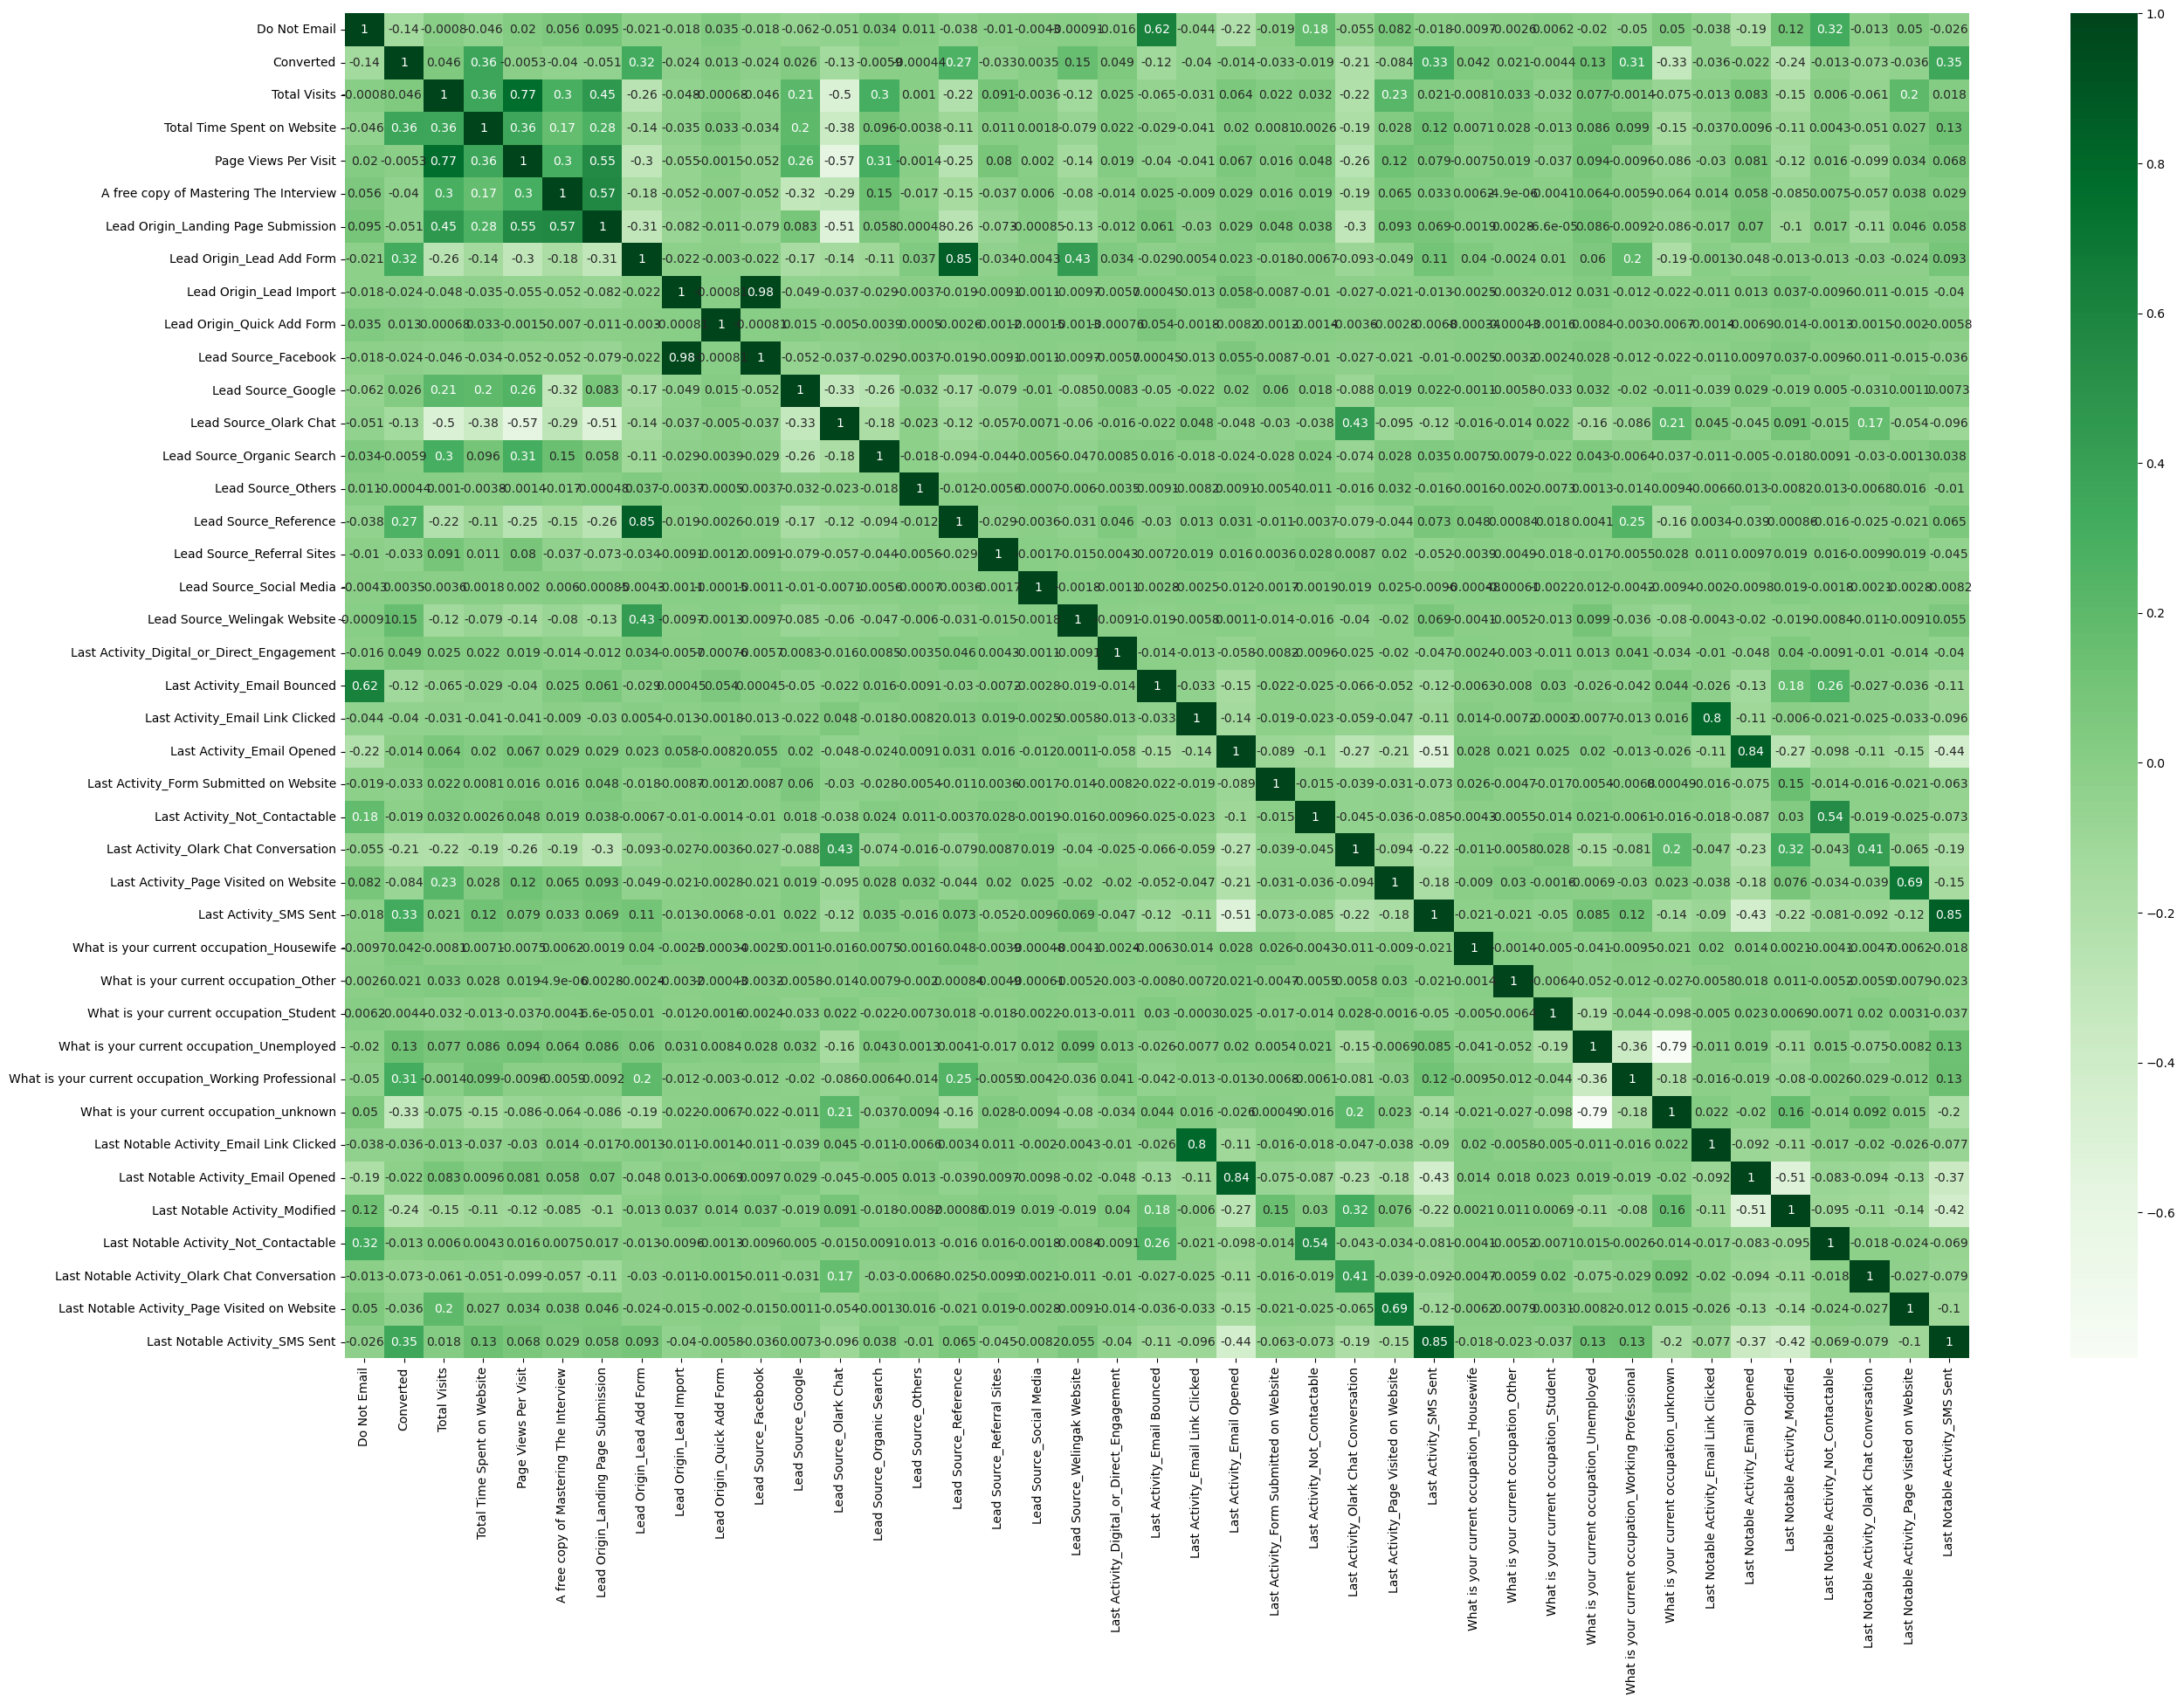

In [1277]:
# Check correlation matrix
plt.figure(figsize = (30,20))        # Size of the figure
sns.heatmap(df.corr(), annot = True, cmap='Greens')
plt.show()

In [1278]:
# Create a dataframe with features and their respective VIFs
def fetch_vif(X_set, col):
    vif = pd.DataFrame()
    vif['Features'] = X_set[col].columns
    vif['VIF'] = [variance_inflation_factor(X_set[col].values, i) for i in range(X_set[col].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

#### RFE and assessing with Statsmodel

In [1279]:
# Logistics model 
logreg = LogisticRegression()

In [1280]:
rfe = RFE(estimator=logreg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [1281]:
pd.DataFrame({'Column_Name': X_train.columns, 'Support': rfe.support_,'Ranking': rfe.ranking_}).sort_values(by='Ranking', ascending=True).reset_index(drop=True)

,Column_Name,Support,Ranking
0,Do Not Email,True,1
1,Lead Source_Reference,True,1
2,Last Activity_Digital_or_Direct_Engagement,True,1
3,Last Activity_Email Opened,True,1
4,Lead Source_Olark Chat,True,1
5,Last Activity_SMS Sent,True,1
6,What is your current occupation_Housewife,True,1
7,Lead Source_Welingak Website,True,1
8,What is your current occupation_Working Profes...,True,1
9,Lead Origin_Lead Add Form,True,1


In [1282]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Digital_or_Direct_Engagement',
       'Last Activity_Email Opened', 'Last Activity_SMS Sent',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'What is your current occupation_unknown',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Not_Contactable',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

In [1283]:
X_train.columns[~rfe.support_]

Index(['Total Visits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Others', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Not_Contactable',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_SMS Sent'],
      dtype=

### Model 1

In [1284]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2608.9
Date:                Mon, 18 Dec 2023   Deviance:                       5217.8
Time:                        04:46:25   Pearson chi2:                 7.34e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4071
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.4129      0.110    -12.851      0.000      -1.628      -1.197
Do Not Email                                            -1.3329      0.191     -6.989      0.000      -1.707      -0.959
Total Time Spent on Website                              1.0936      0.040     27.300      0.000       1.015       1.172
Lead Origin_Lead Add Form                                2.9732      0.482      6.162      0.000       2.028       3.919
Lead Source_Olark Chat                                   1.2325      0.103     12.019      0.000       1.032       1.434
Lead Source_Reference                                    0.5343      0.516      1.035      0.301      -0.477       1.546
Lead Source_Welingak Website                             2.3589      0.863      2.733      0.006       0.667       4.051
Last Activity_Digital_or_Direct_Engagement               2.3146      0.489      4.731      0.000       1.356       3.274
Last Activity_Email Opened                               0.5034      0.111      4.554      0.000       0.287       0.720
Last Activity_SMS Sent                                   1.6282      0.112     14.578      0.000       1.409       1.847
What is your current occupation_Housewife               22.8777   1.38e+04      0.002      0.999    -2.7e+04     2.7e+04
What is your current occupation_Working Professional     2.5296      0.189     13.414      0.000       2.160       2.899
What is your current occupation_unknown                 -1.0787      0.087    -12.367      0.000      -1.250      -0.908
Last Notable Activity_Modified                          -0.7256      0.090     -8.060      0.000      -0.902      -0.549
Last Notable Activity_Not_Contactable                    1.3035      0.318      4.105      0.000       0.681       1.926
Last Notable Activity_Olark Chat Conversation           -0.6696      0.343     -1.951      0.051      -1.342       0.003
========================================================================================================================
"""

In [1285]:
fetch_vif(X_train, col)

,Features,VIF
2,Lead Origin_Lead Add Form,15.84
4,Lead Source_Reference,12.97
5,Lead Source_Welingak Website,3.77
11,What is your current occupation_unknown,1.55
3,Lead Source_Olark Chat,1.52
12,Last Notable Activity_Modified,1.45
7,Last Activity_Email Opened,1.27
0,Do Not Email,1.26
8,Last Activity_SMS Sent,1.26
1,Total Time Spent on Website,1.25


In [1286]:
# p-value of What is your current occupation_Housewife iis high, so we drop it

col = col.drop('What is your current occupation_Housewife',1)

### Model 2

In [1287]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2615.9
Date:                Mon, 18 Dec 2023   Deviance:                       5231.8
Time:                        04:46:25   Pearson chi2:                 7.37e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4058
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.4062      0.110    -12.826      0.000      -1.621      -1.191
Do Not Email                                            -1.3370      0.191     -7.011      0.000      -1.711      -0.963
Total Time Spent on Website                              1.0925      0.040     27.305      0.000       1.014       1.171
Lead Origin_Lead Add Form                                2.9678      0.482      6.153      0.000       2.022       3.913
Lead Source_Olark Chat                                   1.2258      0.102     11.969      0.000       1.025       1.427
Lead Source_Reference                                    0.5590      0.516      1.084      0.278      -0.452       1.570
Lead Source_Welingak Website                             2.3568      0.863      2.731      0.006       0.665       4.048
Last Activity_Digital_or_Direct_Engagement               2.3066      0.489      4.714      0.000       1.348       3.266
Last Activity_Email Opened                               0.5059      0.110      4.590      0.000       0.290       0.722
Last Activity_SMS Sent                                   1.6226      0.111     14.558      0.000       1.404       1.841
What is your current occupation_Working Professional     2.5214      0.188     13.376      0.000       2.152       2.891
What is your current occupation_unknown                 -1.0839      0.087    -12.436      0.000      -1.255      -0.913
Last Notable Activity_Modified                          -0.7201      0.090     -8.017      0.000      -0.896      -0.544
Last Notable Activity_Not_Contactable                    1.3024      0.317      4.102      0.000       0.680       1.925
Last Notable Activity_Olark Chat Conversation           -0.6696      0.343     -1.951      0.051      -1.342       0.003
========================================================================================================================
"""

In [1288]:
fetch_vif(X_train, col)

,Features,VIF
2,Lead Origin_Lead Add Form,15.84
4,Lead Source_Reference,12.97
5,Lead Source_Welingak Website,3.77
10,What is your current occupation_unknown,1.55
3,Lead Source_Olark Chat,1.52
11,Last Notable Activity_Modified,1.45
7,Last Activity_Email Opened,1.27
0,Do Not Email,1.26
8,Last Activity_SMS Sent,1.26
1,Total Time Spent on Website,1.25


In [1289]:
# p-values of Lead Source_Reference is high, let us drop it

col = col.drop('Lead Source_Reference',1)

### Model 3

In [1290]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2616.5
Date:                Mon, 18 Dec 2023   Deviance:                       5232.9
Time:                        04:46:27   Pearson chi2:                 7.30e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4057
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.4064      0.110    -12.832      0.000      -1.621      -1.192
Do Not Email                                            -1.3564      0.191     -7.113      0.000      -1.730      -0.983
Total Time Spent on Website                              1.0922      0.040     27.298      0.000       1.014       1.171
Lead Origin_Lead Add Form                                3.4572      0.190     18.226      0.000       3.085       3.829
Lead Source_Olark Chat                                   1.2247      0.102     11.958      0.000       1.024       1.425
Lead Source_Welingak Website                             1.8691      0.741      2.521      0.012       0.416       3.322
Last Activity_Digital_or_Direct_Engagement               2.3085      0.489      4.720      0.000       1.350       3.267
Last Activity_Email Opened                               0.5078      0.110      4.609      0.000       0.292       0.724
Last Activity_SMS Sent                                   1.6227      0.111     14.562      0.000       1.404       1.841
What is your current occupation_Working Professional     2.5248      0.188     13.403      0.000       2.156       2.894
What is your current occupation_unknown                 -1.0838      0.087    -12.436      0.000      -1.255      -0.913
Last Notable Activity_Modified                          -0.7190      0.090     -8.009      0.000      -0.895      -0.543
Last Notable Activity_Not_Contactable                    1.3024      0.319      4.086      0.000       0.678       1.927
Last Notable Activity_Olark Chat Conversation           -0.6679      0.343     -1.947      0.051      -1.340       0.004
========================================================================================================================
"""

In [1291]:
fetch_vif(X_train, col)

,Features,VIF
9,What is your current occupation_unknown,1.55
3,Lead Source_Olark Chat,1.52
2,Lead Origin_Lead Add Form,1.50
10,Last Notable Activity_Modified,1.45
6,Last Activity_Email Opened,1.27
0,Do Not Email,1.26
7,Last Activity_SMS Sent,1.26
1,Total Time Spent on Website,1.25
4,Lead Source_Welingak Website,1.24
8,What is your current occupation_Working Profes...,1.18


In [1292]:
# p-values of Last Notable Activity_Olark Chat Conversation is marginally high, let us drop it

col = col.drop('Last Notable Activity_Olark Chat Conversation',1)

### Model 4

In [1293]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2618.6
Date:                Mon, 18 Dec 2023   Deviance:                       5237.1
Time:                        04:46:28   Pearson chi2:                 7.32e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4053
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.4703      0.105    -13.958      0.000      -1.677      -1.264
Do Not Email                                            -1.3456      0.191     -7.056      0.000      -1.719      -0.972
Total Time Spent on Website                              1.0900      0.040     27.248      0.000       1.012       1.168
Lead Origin_Lead Add Form                                3.4466      0.190     18.179      0.000       3.075       3.818
Lead Source_Olark Chat                                   1.2018      0.102     11.798      0.000       1.002       1.401
Lead Source_Welingak Website                             1.8719      0.741      2.525      0.012       0.419       3.325
Last Activity_Digital_or_Direct_Engagement               2.3552      0.489      4.819      0.000       1.397       3.313
Last Activity_Email Opened                               0.5724      0.106      5.414      0.000       0.365       0.780
Last Activity_SMS Sent                                   1.6844      0.108     15.667      0.000       1.474       1.895
What is your current occupation_Working Professional     2.5294      0.189     13.418      0.000       2.160       2.899
What is your current occupation_unknown                 -1.0940      0.087    -12.574      0.000      -1.265      -0.923
Last Notable Activity_Modified                          -0.6802      0.088     -7.763      0.000      -0.852      -0.508
Last Notable Activity_Not_Contactable                    1.3640      0.317      4.297      0.000       0.742       1.986
========================================================================================================================
"""

In [1294]:
fetch_vif(X_train, col)

,Features,VIF
9,What is your current occupation_unknown,1.52
2,Lead Origin_Lead Add Form,1.49
3,Lead Source_Olark Chat,1.46
10,Last Notable Activity_Modified,1.43
0,Do Not Email,1.26
6,Last Activity_Email Opened,1.26
7,Last Activity_SMS Sent,1.26
1,Total Time Spent on Website,1.25
4,Lead Source_Welingak Website,1.24
8,What is your current occupation_Working Profes...,1.18


In [1295]:
# The VIF values have stabilized too. We can finalize the model 

#### Prediction on Train set

In [1296]:
#Storing predictions of train set in the variable 'y_train_ored'
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.340486
6795    0.290771
3516    0.389426
8105    0.845814
3934    0.207297
4844    0.991624
3297    0.155331
8071    0.997257
987     0.070173
7423    0.914219
dtype: float64

In [1297]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.34048586, 0.29077083, 0.38942638, 0.8458144 , 0.20729664,
       0.99162448, 0.15533057, 0.99725662, 0.07017289, 0.91421928])

In [1298]:
# Data frame with given conversion flag and probablity of predicting
y_train_pred_final = pd.DataFrame({'Actual_conversion':y_train.values, 'Conversion_prob':y_train_pred})
y_train_pred_final.head()

,Actual_conversion,Conversion_prob
0,0,0.340486
1,0,0.290771
2,0,0.389426
3,0,0.845814
4,0,0.207297


In [1299]:
# Predicting with 0 or 1 with the cut off at 0.5
y_train_pred_final['Predicted_outcome'] = y_train_pred_final.Conversion_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Actual_conversion,Conversion_prob,Predicted_outcome
0,0,0.340486,0
1,0,0.290771,0
2,0,0.389426,0
3,0,0.845814,1
4,0,0.207297,0


# Model Evaluation


- Sensitivity (Recall) represents the percentage of correctly identified conversions. If identifying conversion leads accurately is crucial, opt for a model with higher Sensitivity.

- Specificity indicates the percentage of correctly identified non-conversions. If identifying non-conversions accurately is more important, we will choose Specificity as the metric.

- Precision gives the probability that a positive prediction is indeed positive. 

-  F1 score, the weighted average of Precision and Recall, is a reliable metric to evaluate the model.


In [1300]:
# Creating ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [1301]:
# Creating 
def draw_precision_recall(actual_values, probability_estimates):
    
    p, r, thresholds = precision_recall_curve(actual_values, probability_estimates)
    plt.plot(thresholds, p[:-1], "b-", label="Precision")
    plt.plot(thresholds, r[:-1], "r-", label="Recall")
    plt.title("Precison - Recall Trade off")
    plt.legend(loc="lower right")
    plt.show()

In [1302]:
def get_metrics(y, pred, prob_est):
    # Confusion Matrix
    tn, fp, fn, tp = confusion_matrix(y, pred).ravel()
    precision = precision_score(y, pred)
    recall = recall_score(y, pred)
    f = f1_score(y, pred)
    
    #Accuracy
    print(f"Accuracy: {metrics.accuracy_score(y, pred)}")

    # Sensitivity, Specificity
    print(f"Sensitivity (Recall): {recall}\nSpecificity: {tn/(tn+fp)}\nPrecision: {precision}\nF-Score: {f}")

    # Reciever Operating Characteristic Curve
    draw_roc(y, prob_est.iloc[:, 1])

    # Precision Recall Curve
    draw_precision_recall(y, prob_est.iloc[:, 1])

Accuracy: 0.8155534941249227
Sensitivity (Recall): 0.694647201946472
Specificity: 0.8900549725137431
Precision: 0.7956339990710636
F-Score: 0.7417189867936782


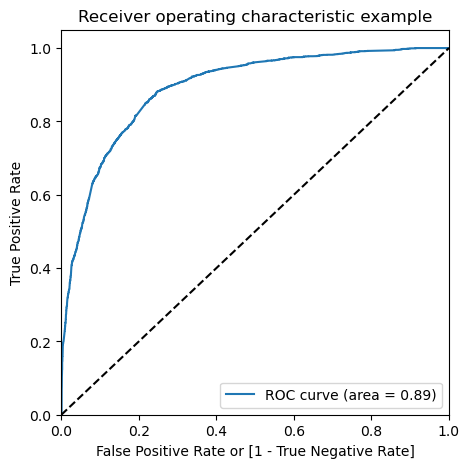

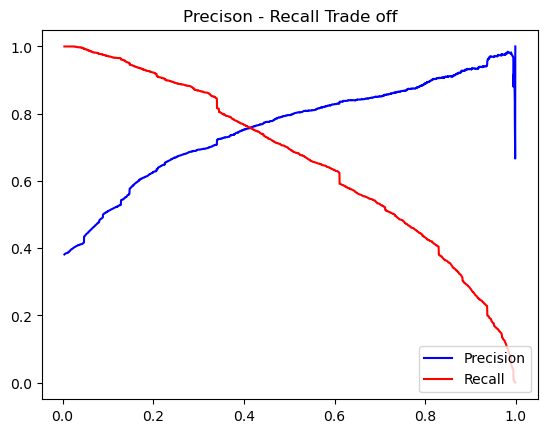

In [1303]:
#Evaluating performance of model on train set

get_metrics(y_train_pred_final.Actual_conversion, y_train_pred_final.Predicted_outcome, y_train_pred_final)

### Finding Optimal Cutoff

It is to balance sensitivity and specificity

In [1304]:
# Creating columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Actual_conversion,Conversion_prob,Predicted_outcome,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.340486,0,1,1,1,1,0,0,0,0,0,0
1,0,0.290771,0,1,1,1,0,0,0,0,0,0,0
2,0,0.389426,0,1,1,1,1,0,0,0,0,0,0
3,0,0.845814,1,1,1,1,1,1,1,1,1,1,0
4,0,0.207297,0,1,1,1,0,0,0,0,0,0,0


In [1305]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])

# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Actual_conversion, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    
#extracting the optimal cut-off value by calculating variance between prob, sensi and speci
cutoff_df['var'] = np.var([cutoff_df.accuracy, cutoff_df.sensitivity, cutoff_df.specificity], axis=0)

#printing cutoff dataframe
cutoff_df

,probability,accuracy,sensitivity,specificity,var
0.0,0.0,0.381262,1.000000,0.000000,0.169800
0.1,0.1,0.633117,0.971614,0.424538,0.050820
0.2,0.2,0.760049,0.922141,0.660170,0.011653
0.3,0.3,0.803185,0.868208,0.763118,0.001875
0.4,0.4,0.815090,0.766829,0.844828,0.001033
0.5,0.5,0.815553,0.694647,0.890055,0.006484
0.6,0.6,0.809833,0.632198,0.919290,0.013995
0.7,0.7,0.786024,0.531630,0.942779,0.028703
0.8,0.8,0.762987,0.431468,0.967266,0.048746
0.9,0.9,0.717378,0.278994,0.987506,0.085238


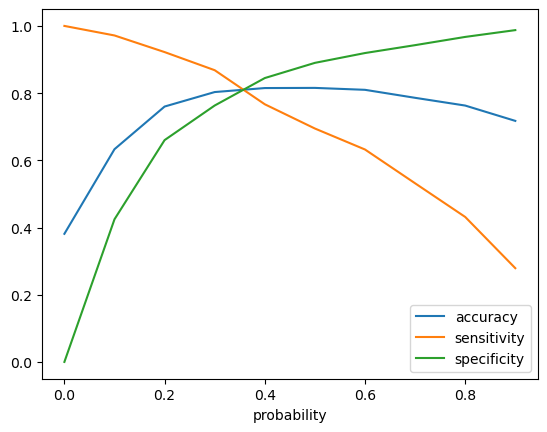

Optimum cut-off value is: 0.4


In [1306]:
# Plotting the table above 

cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

cutoff_value = cutoff_df.sort_values('var').head(1)['probability'].values[0]
print(f"Optimum cut-off value is: {cutoff_value}")

In [1307]:
# Predicting with 0 or 1 with the cut off value

y_train_pred_final['Predicted_outcome'] = y_train_pred_final.Conversion_prob.map( lambda x: 1 if x > cutoff_value else 0)
y_train_pred_final.head()

,Actual_conversion,Conversion_prob,Predicted_outcome,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.340486,0,1,1,1,1,0,0,0,0,0,0
1,0,0.290771,0,1,1,1,0,0,0,0,0,0,0
2,0,0.389426,0,1,1,1,1,0,0,0,0,0,0
3,0,0.845814,1,1,1,1,1,1,1,1,1,1,0
4,0,0.207297,0,1,1,1,0,0,0,0,0,0,0


Accuracy: 0.8150896722325294
Sensitivity (Recall): 0.7668288726682887
Specificity: 0.8448275862068966
Precision: 0.7527866242038217
F-Score: 0.7597428686219364


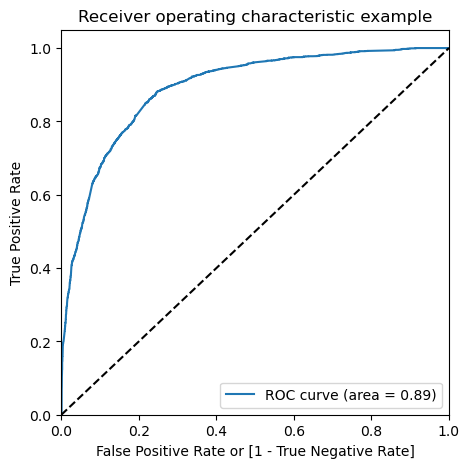

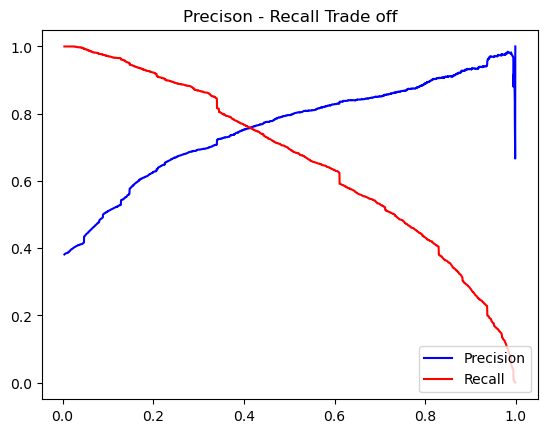

In [1308]:
#Performance of model on train set at optimal cutoff

get_metrics(y_train_pred_final.Actual_conversion, y_train_pred_final.Predicted_outcome, y_train_pred_final)

#### Lead scoring on train set on optimal cutoff value

In [1309]:
#calculating leadscore
y_train_pred_final['Lead_Score'] = y_train_pred_final.Conversion_prob.map( lambda x: round(x*100))

#printing df
y_train_pred_final[['Actual_conversion','Conversion_prob','Predicted_outcome','Lead_Score']].head()

,Actual_conversion,Conversion_prob,Predicted_outcome,Lead_Score
0,0,0.340486,0,34
1,0,0.290771,0,29
2,0,0.389426,0,39
3,0,0.845814,1,85
4,0,0.207297,0,21


Since the company wants to make sure that the phone calls that they make lead to 80% of conversion rate, we would have to change the cutoff value to give us precision equal to or more than 80%. Looking at the curve above, we would want the cutoff to be greater than 0.4

#### Adjusting Cutoff to 0.5 for increased Precision

In [1310]:
# Predicting with 0 or 1 with at 0.5 cut off

y_train_pred_final['Predicted_outcome'] = y_train_pred_final.Conversion_prob.map( lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Actual_conversion,Conversion_prob,Predicted_outcome,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Lead_Score
0,0,0.340486,0,1,1,1,1,0,0,0,0,0,0,34
1,0,0.290771,0,1,1,1,0,0,0,0,0,0,0,29
2,0,0.389426,0,1,1,1,1,0,0,0,0,0,0,39
3,0,0.845814,1,1,1,1,1,1,1,1,1,1,0,85
4,0,0.207297,0,1,1,1,0,0,0,0,0,0,0,21


Accuracy: 0.8155534941249227
Sensitivity (Recall): 0.694647201946472
Specificity: 0.8900549725137431
Precision: 0.7956339990710636
F-Score: 0.7417189867936782


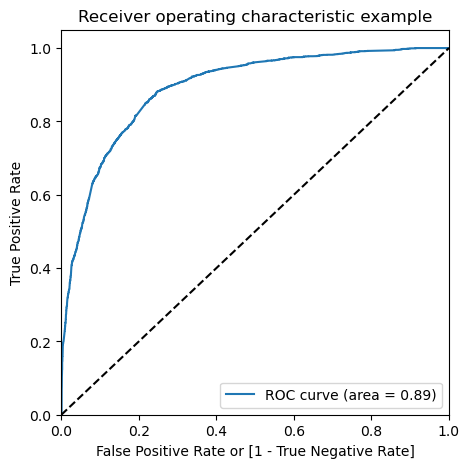

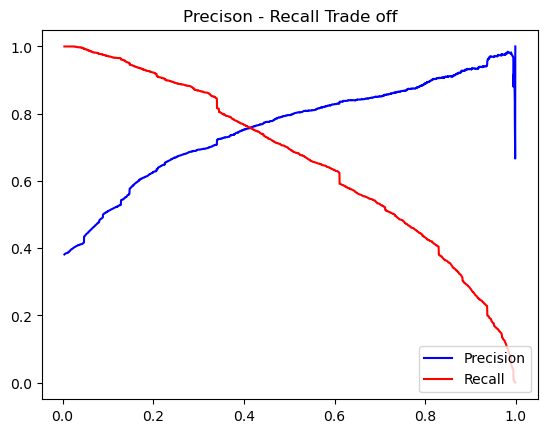

In [1311]:
#Performance of model on train set at optimal cutoff

get_metrics(y_train_pred_final.Actual_conversion, y_train_pred_final.Predicted_outcome, y_train_pred_final)

“To improve Precision, which quantifies how many of the leads predicted to convert actually do convert, we often have to compromise on Recall, which measures how many of the actual conversions are correctly identified by the model.”

# Measuring performance on Test Set

In [1312]:
# Scaling numeric values

scaler = StandardScaler()
num_cols = ['Total Visits', 'Total Time Spent on Website', 'Page Views Per Visit']
X_test[num_cols] = scaler.fit_transform(X_test[num_cols])


In [1313]:
X_test.shape

(2772, 40)

In [1314]:
# Select the columns of X_train for X_test as well

X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Digital_or_Direct_Engagement,Last Activity_Email Opened,Last Activity_SMS Sent,What is your current occupation_Working Professional,What is your current occupation_unknown,Last Notable Activity_Modified,Last Notable Activity_Not_Contactable
4269,0,0.933036,0,0,0,0,0,1,0,1,0,0
2376,0,-0.900812,1,0,0,0,0,1,0,0,0,0
7766,0,-0.793792,0,0,0,0,0,0,1,0,0,1
9199,0,-0.900812,0,1,0,0,0,0,0,0,1,0
4359,0,-0.900812,1,0,0,0,1,0,0,0,0,0


In [1315]:
# Add a constant to X_test

X_test_sm = sm.add_constant(X_test)

# Checking X_test_sm
X_test_sm.shape


(2772, 13)

In [1316]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

4269    0.534218
2376    0.935764
7766    0.826057
9199    0.126692
4359    0.827335
9186    0.608784
1631    0.530730
8963    0.205891
8007    0.028027
5324    0.389015
dtype: float64

In [1317]:
y_test_pred = y_test_pred.values.reshape(-1)
y_test_pred[:10]

array([0.53421792, 0.93576442, 0.82605737, 0.12669197, 0.82733484,
       0.60878361, 0.53072974, 0.20589053, 0.0280267 , 0.38901513])

In [1318]:

#converting in dataframe 
y_test_pred_final = pd.DataFrame({'Actual_conversion':y_test.values, 'Conversion_prob':y_test_pred})
y_test_pred_final.head()

,Actual_conversion,Conversion_prob
0,1,0.534218
1,1,0.935764
2,1,0.826057
3,0,0.126692
4,1,0.827335


#### Predicting conversion on optimal cutoff 0.4

In [1319]:
# Predicting with 0 or 1 with the optimal cut off value

y_test_pred_final['Predicted_outcome'] = y_test_pred_final.Conversion_prob.map(lambda x: 1 if x > cutoff_value else 0)
y_test_pred_final.head()


,Actual_conversion,Conversion_prob,Predicted_outcome
0,1,0.534218,1
1,1,0.935764,1
2,1,0.826057,1
3,0,0.126692,0
4,1,0.827335,1


Accuracy: 0.8142135642135642
Sensitivity (Recall): 0.7579908675799086
Specificity: 0.8509242695289206
Precision: 0.7685185185185185
F-Score: 0.7632183908045977


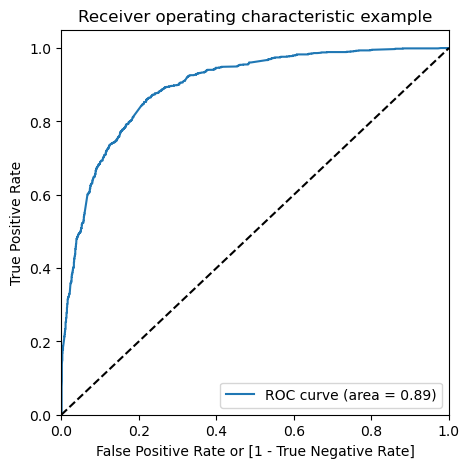

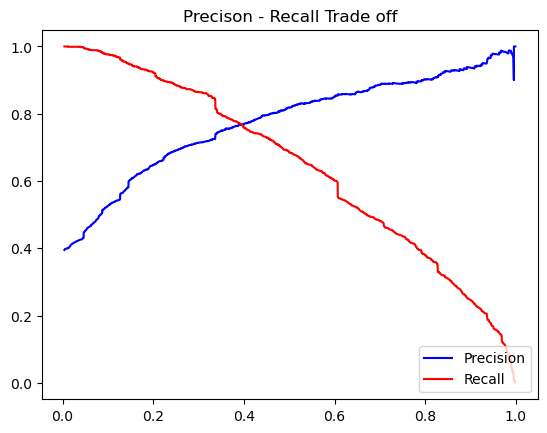

In [1320]:
# Performance of model on test set at optimal cutoff value

get_metrics(y_test_pred_final.Actual_conversion, y_test_pred_final.Predicted_outcome, y_test_pred_final)

- With the current cut off at 0.4 the model's accuracy is at 81%, sensitivity is at 75% and and specificity is at 85%. The Precision at 76%

- The model can correctly identify conversions (Sensitivity or Recall) by 75%

- The model can correcntly identify non-conversions by 85% (Specificity)

- The probability that a lead identified as conversion will actually convert is 76%

#### Lead scoring using test set

In [1325]:
#Adding lead Score column
y_test_pred_final['Lead_Score'] = y_test_pred_final.Conversion_prob.map( lambda x: round(x*100))
y_test_pred_final.head(10)

,Actual_conversion,Conversion_prob,Predicted_outcome,Lead_Score
0,1,0.534218,1,53
1,1,0.935764,1,94
2,1,0.826057,1,83
3,0,0.126692,0,13
4,1,0.827335,1,83
5,1,0.608784,1,61
6,1,0.530730,1,53
7,1,0.205891,0,21
8,0,0.028027,0,3
9,1,0.389015,0,39


# Conclusion
It was found that the variables that mattered the most in the increasing probability of converting a lead are as follows - 

In [1322]:
# Getting the variables that influence the conversion rate with coefficients
coeff.sort_values(ascending=False)

Lead Origin_Lead Add Form                               3.446599
What is your current occupation_Working Professional    2.529414
Last Activity_Digital_or_Direct_Engagement              2.355199
Lead Source_Welingak Website                            1.871932
Last Activity_SMS Sent                                  1.684352
Last Notable Activity_Not_Contactable                   1.364020
Lead Source_Olark Chat                                  1.201783
Total Time Spent on Website                             1.089983
Last Activity_Email Opened                              0.572401
Last Notable Activity_Modified                         -0.680168
What is your current occupation_unknown                -1.093985
Do Not Email                                           -1.345642
const                                                  -1.470275
dtype: float64

In [1323]:
# Calculating odd ratios and create a DataFrame with variable names

Odds = pd.DataFrame({
    'Variable': coeff.index,
    'Odds Ratio': np.exp(coeff)
})

# Sort the DataFrame by Odds Ratio in descending order
Odds_sorted = Odds.sort_values('Odds Ratio', ascending=False)

# Print the sorted DataFrame
print(Odds_sorted.reset_index(drop=True))


                                             Variable  Odds Ratio
0                           Lead Origin_Lead Add Form   31.393435
1   What is your current occupation_Working Profes...   12.546146
2          Last Activity_Digital_or_Direct_Engagement   10.540221
3                        Lead Source_Welingak Website    6.500847
4                              Last Activity_SMS Sent    5.388959
5               Last Notable Activity_Not_Contactable    3.911888
6                              Lead Source_Olark Chat    3.326044
7                         Total Time Spent on Website    2.974224
8                          Last Activity_Email Opened    1.772518
9                      Last Notable Activity_Modified    0.506532
10            What is your current occupation_unknown    0.334879
11                                       Do Not Email    0.260373
12                                              const    0.229862
